Example of the use of the eFEL (eFeature Extraction Library) in conjunction with models downloaded from the Neocortical Microcircuit Portal website

Requirements:
- Python 2.6+, including Pip (https://pip.readthedocs.org)
- A version of Neuron (with Python support) installed on your computer (for instruction, see https://bbp.epfl.ch/nmc-portal/tools)

Make matplotlib plots show up in the notebook: 

In [1]:
%matplotlib inline

Install the eFeature Extraction Library:

In [13]:
!pip install efel
import efel

Get a model package from the website

In [3]:
!curl -o L5_TTPC2.zip  https://bbp.epfl.ch/nmc-portal/documents/10184/1921755/L5_TTPC2_cADpyr232_1.zip/a058fc9c-6c67-417b-a65b-20742902ccbb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1718k    0 1718k    0     0  6956k      0 --:--:-- --:--:-- --:--:-- 6984k


Unzip the model package:

In [6]:
!unzip -f L5_TTPC2.zip

Archive:  L5_TTPC2.zip


Change directory to the model package directory:

In [7]:
import os
os.chdir('L5_TTPC2_cADpyr232_1')

Compile the Neuron mechanisms (if this fails, you might not have installed Neuron correctly)

In [8]:
!nrnivmodl mechanisms

/Users/werner/src/eFEL/examples/nmc-portal/L5_TTPC2_cADpyr232_1
mechanisms/CaDynamics_E2.mod mechanisms/Ca_HVA.mod mechanisms/Ca_LVAst.mod mechanisms/Ih.mod mechanisms/Im.mod mechanisms/K_Pst.mod mechanisms/K_Tst.mod mechanisms/NaTa_t.mod mechanisms/NaTs2_t.mod mechanisms/Nap_Et2.mod mechanisms/ProbAMPANMDA_EMS.mod mechanisms/ProbGABAAB_EMS.mod mechanisms/SK_E2.mod mechanisms/SKv3_1.mod
CaDynamics_E2.mod Ca_HVA.mod Ca_LVAst.mod Ih.mod Im.mod K_Pst.mod K_Tst.mod NaTa_t.mod NaTs2_t.mod Nap_Et2.mod ProbAMPANMDA_EMS.mod ProbGABAAB_EMS.mod SK_E2.mod SKv3_1.mod
"/usr/local/Cellar/neuron/7.4/share/nrn/libtool"  --mode=compile clang -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/Cellar/neuron/7.4/include/nrn" -I"/usr/local/Cellar/neuron/7.4/libexec/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  clang -DHAVE_CONFIG_H -I. -I.. -I/usr/local/Cellar/neuron/7.4/include/nrn -I/usr/local/Cellar/neuron/7.4/libexec/lib -g -O2 -c mod_func.c  -fno-common -DPIC -o .libs/mod_func.o
"/usr/local/Ce

Import the model package in Python, and run it:

Loading constants
Loading cell cADpyr232_L5_TTPC2_8052133265
Attaching stimulus electrodes
Setting up step current clamp: amp=0.593063 nA, delay=700.000000 ms, duration=2000.000000 ms
Setting up hypamp current clamp: amp=-0.286011 nA, delay=0.000000 ms, duration=3000.000000 ms
Attaching recording electrodes
Setting simulation time to 3s for the step currents
Disabling variable timestep integration
Running for 3000.000000 ms
Soma voltage for step 1 saved to: python_recordings/soma_voltage_step1.dat
Loading cell cADpyr232_L5_TTPC2_8052133265
Attaching stimulus electrodes
Setting up step current clamp: amp=0.642485 nA, delay=700.000000 ms, duration=2000.000000 ms
Setting up hypamp current clamp: amp=-0.286011 nA, delay=0.000000 ms, duration=3000.000000 ms
Attaching recording electrodes
Setting simulation time to 3s for the step currents
Disabling variable timestep integration
Running for 3000.000000 ms
Soma voltage for step 2 saved to: python_recordings/soma_voltage_step2.dat
Loading cell

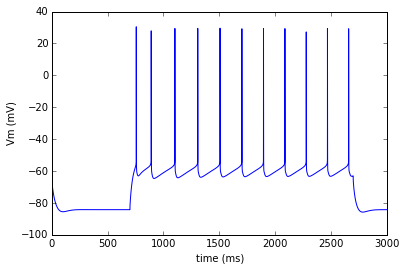

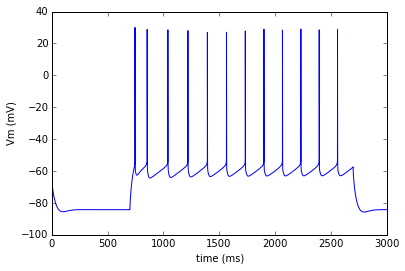

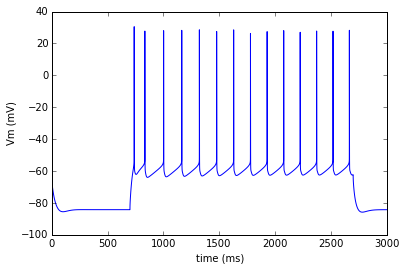

In [9]:
import run
run.main(plot_traces=True)

Load the output of the model package in numpy array

In [10]:
import numpy
times = []
voltages = []
for step_number in range(1,4):
    data = numpy.loadtxt('python_recordings/soma_voltage_step%d.dat' % step_number)
    times.append(data[:, 0])
    voltages.append(data[:, 1])

Prepare the traces for the eFEL

In [11]:
traces = []
for step_number in range(3):
    trace = {}
    trace['T'] = times[step_number]
    trace['V'] = voltages[step_number]
    trace['stim_start'] = [700]
    trace['stim_end'] = [2700]
    traces.append(trace)

Run the eFEL on the trace

In [17]:
feature_values = efel.getFeatureValues(traces, ['AP_amplitude', 'mean_frequency', 'adaptation_index2', 'ISI_CV', 'doublet_ISI', 'time_to_first_spike', 'AP_height', 'AHP_depth_abs', 'AHP_depth_abs_slow', 'AHP_slow_time', 'AP_width', 'peak_time'])

Plot frequencies over steps

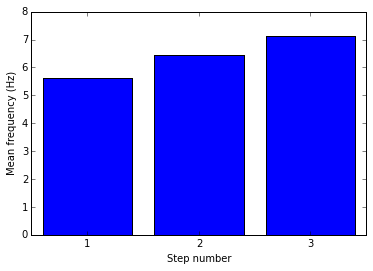

In [33]:
import pylab
for step_number in range(3):
    pylab.bar(step_number, feature_values[step_number]['mean_frequency'][0], align='center')
pylab.ylabel('Mean frequency (Hz)')
pylab.xlabel('Step number')
pylab.xticks(range(3), range(1,4))
pylab.show()